
1. Importing Libraries and Loading Data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

def load_data(file_path):
    """Load dataset from a given file path."""
    return pd.read_csv(file_path)

# Load the dataset
file_path = r'C:\Users\syedk\Downloads\Bharat-Intern\House Price Prediction\housing.csv'
data = load_data(file_path)

2. Data Exploration

In [9]:
def explore_data(data):
    """Display the first few rows and summary statistics of the dataset."""
    print(data.head())
    print(data.describe())

# Data Exploration
explore_data(data)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

3. Data Visualization

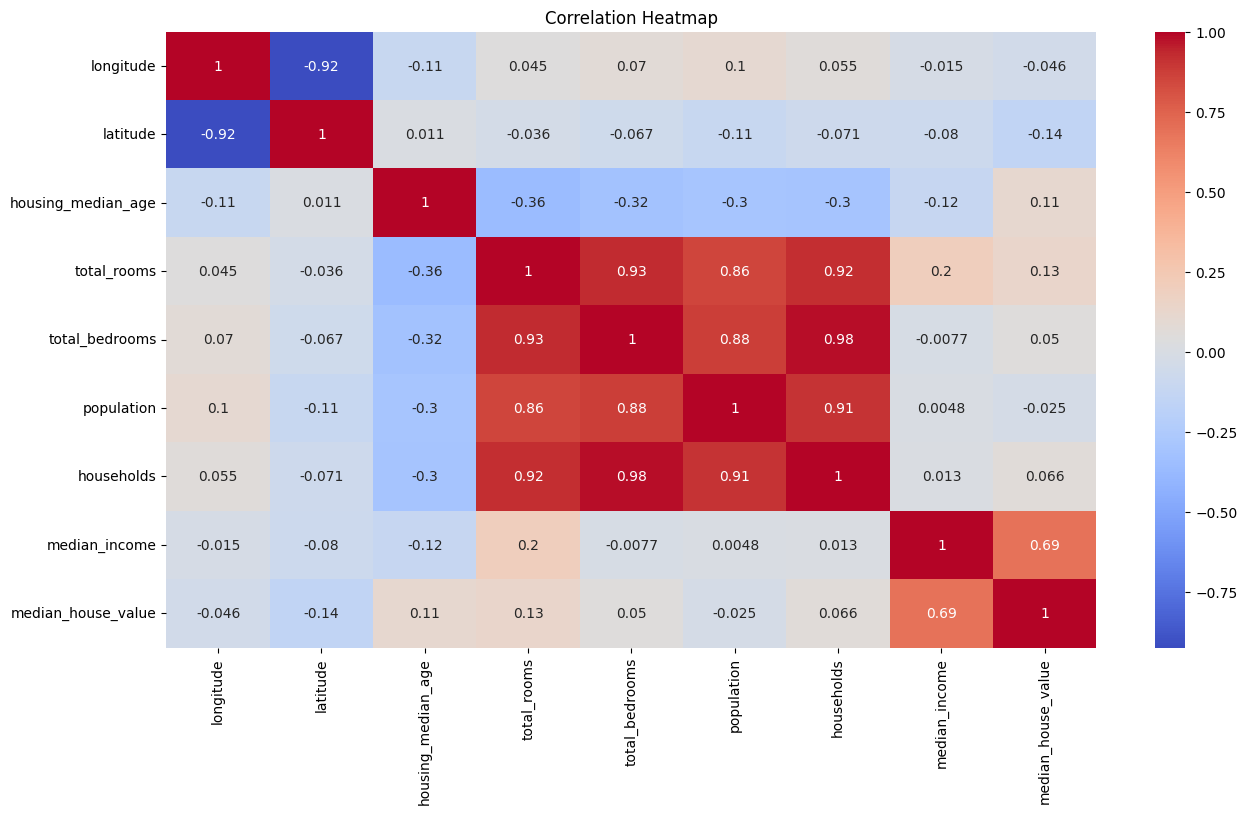

In [10]:
def visualize_correlation(data):
    """Visualize the correlation heatmap of numeric features."""
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(15, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
    plt.title('Correlation Heatmap')
    plt.show()

# Visualization
visualize_correlation(data)


4. Data Preprocessing

In [11]:
# Data Preprocessing
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def preprocess_data(data):
    """Preprocess the dataset."""
    X = data.drop("median_house_value", axis=1)
    y = data["median_house_value"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Identify and encode categorical columns
    X_train_encoded = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=True)
    
    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_encoded)
    X_test_scaled = scaler.transform(X_test_encoded)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Preprocessing
X_train, X_test, y_train, y_test = preprocess_data(data)


5. Model Training - Linear Regression

In [13]:
def train_linear_regression(X_train, y_train):
    """Train a Linear Regression model."""
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    # Evaluate on training set
    y_pred_train = reg.predict(X_train)
    r_squared = r2_score(y_train, y_pred_train)
    print(f"R-squared value on training set: {r_squared:.2f}")

# Train Linear Regression Model
train_linear_regression(X_train, y_train)


R-squared value on training set: 0.65


6. Model Training - Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def train_random_forest(X_train, y_train):
    """Train a Random Forest Regressor model."""
    
    # Step 1: Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    
    # Step 2: Define the pipeline with imputation and the model
    pipeline = Pipeline([
        ('imputer', imputer),  # Add imputation step
        ('model', RandomForestRegressor(random_state=42))
    ])

    # Step 3: Define the hyperparameters to tune
    param_grid = {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    }

    # Step 4: Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
    
    # Step 5: Fit the GridSearchCV to find the best model
    grid_search.fit(X_train_imputed, y_train)  # Use the imputed data here
    
    # Step 6: Print the best parameters found
    print("Best parameters:", grid_search.best_params_)
    
    # Step 7: Return the best model
    return grid_search.best_estimator_

# Train Random Forest Model and get the best model
best_model = train_random_forest(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 150}


Model Evaluation on Test Set

1.Linear Regression 

In [21]:
def train_linear_regression(X_train, y_train, X_test, y_test):
    """Train a Linear Regression model and evaluate it on both training and test sets."""
    
    # Handle NaN values by imputing with mean value
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Initialize and train the Linear Regression model
    reg = LinearRegression()
    reg.fit(X_train_imputed, y_train)
    
    # Evaluate on training set
    y_pred_train = reg.predict(X_train_imputed)
    r_squared_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print(f"Training set R-squared: {r_squared_train:.2f}")
    print(f"Training set Mean Squared Error (MSE): {mse_train:.2f}")
    
    # Evaluate on test set
    y_pred_test = reg.predict(X_test_imputed)
    r_squared_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Test set R-squared: {r_squared_test:.2f}")
    print(f"Test set Mean Squared Error (MSE): {mse_test:.2f}")
    
    # Return the trained model
    return reg

# Train and evaluate the Linear Regression model
trained_model = train_linear_regression(X_train, y_train, X_test, y_test)

Training set R-squared: 0.63
Training set Mean Squared Error (MSE): 4825387126.38
Test set R-squared: 0.62
Test set Mean Squared Error (MSE): 4876482920.67


2. Random Forest

In [22]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy, for example, median filling
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming you have your data split into training and test sets as X_train, X_test, y_train, and y_test

# Step 1: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like median, most_frequent, etc.

# Impute missing values in the training and test datasets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Using transform for the test set to avoid data leakage

# Step 2: Initialize and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

# Predictions on training and test sets
y_pred_train = model.predict(X_train_imputed)
y_pred_test = model.predict(X_test_imputed)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training set - R-squared (R2): {r2_train:.2f}")
print(f"Training set - Mean Squared Error (MSE): {mse_train:.2f}")

print(f"\nTest set - R-squared (R2): {r2_test:.2f}")
print(f"Test set - Mean Squared Error (MSE): {mse_test:.2f}")


Training set - R-squared (R2): 0.97
Training set - Mean Squared Error (MSE): 457709256.30

Test set - R-squared (R2): 0.75
Test set - Mean Squared Error (MSE): 3222059845.15


In [33]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # Importing joblib for saving and loading models

# Your code for data preparation, model training, and evaluation goes here...

# Save the model to a file named 'best_model.pkl'
joblib.dump(model, 'best_model.pkl')


['best_model.pkl']

In [27]:
print("Shape of X_train_imputed:", X_train_imputed.shape)
print("Shape of X_test_imputed:", X_test_imputed.shape)


Shape of X_train_imputed: (3302, 12)
Shape of X_test_imputed: (826, 12)
